# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

This experiment is to visualize how momentum parameter in stochastic gradient descent helps in escaping from local minima

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}

In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython

ipython = get_ipython()
  
notebook="M3W12_CS_1_SGDvsMomentum" #name of the notebook
Answer = "Ungraded"
def setup():
    #ipython.magic("sx pip install gizeh")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


###Importing required packages


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3203072/45929032 bytes (7.0%)7315456/45929032 bytes (15.9%)11280384/45929032 bytes (24.6%)15351808/45929032 bytes (33.4%)19431424/45929032 bytes (42.3%)23527424/45929032 bytes (51.2%)27615232/45929032 bytes (60.1%)31711232/45929032 bytes (69.0%)35627008/45929032 bytes (77.6%)39731200/45929032 bytes (86.5%)43851776/45929032 bytes (95.5%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

###Define and plot the  wave function $f(x) = Sin(x^{2})+Sin(x)$

In [0]:
x = np.linspace(-4, 4, 100)
y = np.sin(x**2) + np.sin(x)

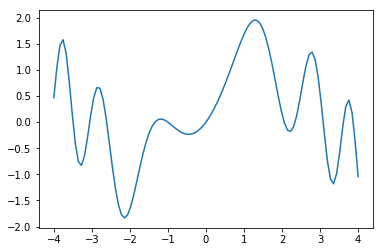

In [6]:
fig = plt.figure()
def plot_surface(ax,t):
    x = np.linspace(-4, 4, 100)
    y = np.sin(x**2) + np.sin(x)
    ax.plot(x,y)
    ax.set_title(t)
    plt.show()
plt.plot(x,y)
plt.show()





### Defining a function to get the gradients of the wave function

In [0]:
def gradients(x):
    dx = 2*x*np.cos(x**2)+np.cos(x)
    return dx

### Defining the Stochastic Gradient Descent (SGD) and Momentum

In [0]:
def SGD(eta):
    xs_grad = []
    ys_grad = []

    x_grad,y_grad = 1.11, 1.8
    for i in range(200):
        xs_grad.append(x_grad)
        ys_grad.append(y_grad)
        dx = gradients(x_grad)
        #print(x_grad, y_grad, z_grad)
        x_grad=x_grad-eta*dx
        y_grad=np.sin(x_grad**2) + np.sin(x_grad)
    return xs_grad, ys_grad

def momentum(beta, eta):
    x_mm,y_mm = 1.11, 1.8
    vx =  0
    xs_mm = []
    ys_mm = []
    for i in range(200):
        xs_mm.append(x_mm)
        ys_mm.append(y_mm)
        dx = gradients(x_mm)
        vx = beta*vx+dx
        x_mm=x_mm-eta*vx
        y_mm=np.sin(x_mm**2) + np.sin(x_mm)
    return xs_mm, ys_mm

In [0]:
#%matplotlib inline
def make_frame(t):
    if t==0:
        plot_surface(ax, 'SGD ($eta$=0.05)')
    if t<9.95:
        #break
        t= int(t*2)
        if t%2 == 0:
            ax.plot([xs_grad[t], xs_grad[t+1]], [ys_grad[t], ys_grad[t+1]], c='b')
        else:
            ax.plot([xs_grad[t], xs_grad[t+1]], [ys_grad[t], ys_grad[t+1]], c='r')
    return mplfig_to_npimage(fig)

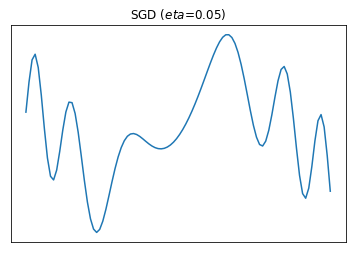


[MoviePy] Building file SGD_Nonconvex_2D.gif with imageio


100%|█████████▉| 200/201 [00:08<00:00, 23.08it/s]


In [10]:
xs_grad, ys_grad = SGD(0.05)
duration=10
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
animation = VideoClip(make_frame, duration=duration)
animation.write_gif("SGD_Nonconvex_2D.gif",fps=20, opt="OptimizePlus", fuzz=10)


In [11]:
with open('SGD_Nonconvex_2D.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def make_frame1(t):
    if t==0:
        plot_surface(ax, 'Momentum ($beta$=0.9 $eta$=0.05)')
    if t<9.95:
        #break
        t= int(t*2)
        if t%2 == 0:
            ax.plot([xs_grad[t], xs_grad[t+1]], [ys_grad[t], ys_grad[t+1]], c='b')
        else:
            ax.plot([xs_grad[t], xs_grad[t+1]], [ys_grad[t], ys_grad[t+1]], c='r')
    return mplfig_to_npimage(fig)

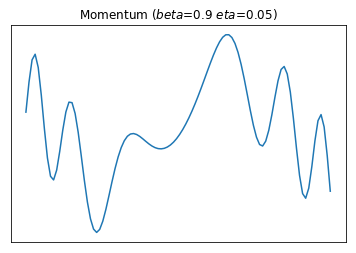


[MoviePy] Building file MM_Nonconvex_2D.gif with imageio


100%|█████████▉| 200/201 [00:09<00:00, 14.03it/s]


In [13]:
xs_grad, ys_grad = momentum(0.9, 0.05)
duration=10
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
animation = VideoClip(make_frame1, duration=duration)
animation.write_gif("MM_Nonconvex_2D.gif",fps=20, opt="OptimizePlus", fuzz=10)

In [14]:
with open('MM_Nonconvex_2D.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

Output hidden; open in https://colab.research.google.com to view.

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test'\"" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [18]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5847
Date of submission:  06 Jun 2019
Time of submission:  15:55:30
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
